In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

connection = sqlite3.connect('tips.db')
cursor = connection.cursor()

def select(query):
    try:
        return pd.read_sql_query(query, connection)
    except:
        cursor.executescript(query)
        connection.commit()


In [5]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,vegan,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   vegan       244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


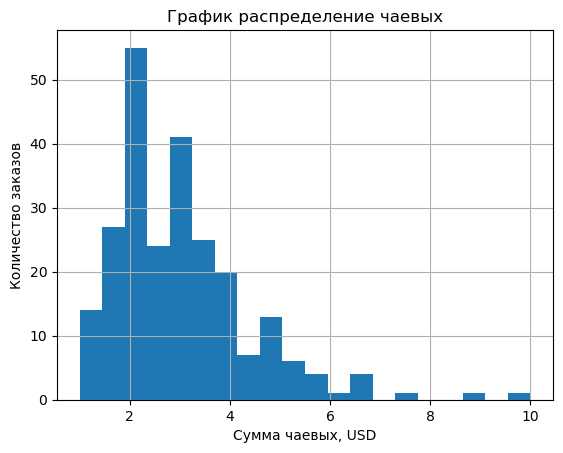

In [19]:
ax = tips.tip.hist(bins = 20)

ax.set_title('График распределение чаевых')
ax.set_ylabel('Количество заказов')
ax.set_xlabel('Сумма чаевых, USD');

In [20]:
tips_pivot = tips.pivot_table(values = ['total_bill', 'tip'], index = 'day')
tips_pivot

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


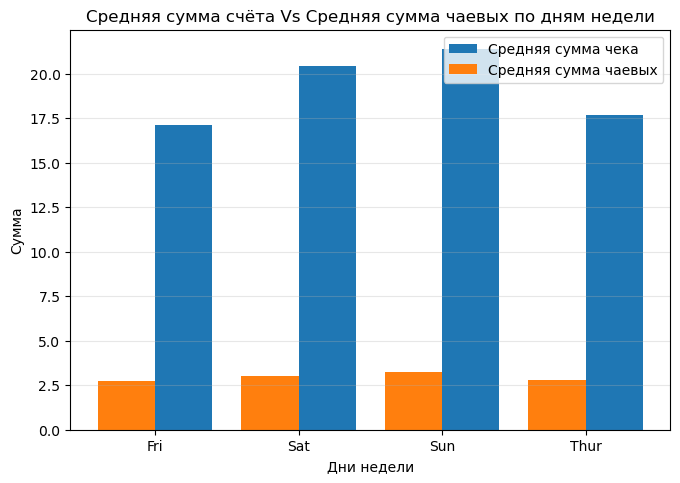

In [41]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x = tips_pivot.index, 
       height = tips_pivot['total_bill'], 
       width = 0.4, 
       align = 'edge', 
       label = 'Средняя сумма чека')
ax.bar(x = tips_pivot.index, 
      height = tips_pivot['tip'],
      width = -0.4, 
      align = 'edge',
      label = 'Средняя сумма чаевых')
ax.set_title("Средняя сумма счёта Vs Cредняя сумма чаевых по дням недели")
ax.set_xlabel('Дни недели')
ax.set_ylabel('Cyммa')
ax.grid(alpha = 0.3, axis = 'y')

ax.legend(loc = 1)